[View in Colaboratory](https://colab.research.google.com/github/EoinRaff/AIP_Miniproject/blob/master/picasso.ipynb)

# Introduction

This code needs to be run in order to authorize the Collabatory project and mount google drive.
The first block may need to be run multiple times to work properly #DontAskWhy


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17)

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# Setup

This section performs initial setup of the project. This includes importing libraries, and loading and pre-processing content and style images.

This section may need to be edited depending on what the root folder is. it doesn't like to change to "drive/AIP_Miniproject" so may have to be called twice, ones to "drive" then again to "AIP_Miniproject"

In [4]:
import os
os.chdir("drive/AIP_Miniproject")
!dir

block.jpg		 marilyn.jpg	   vanBlock2.png
content			 picasso.jpg	   vanBlock.png
drive			 README.md	   van_blough2.png
eoin.jpg		 Results.odt	   van_blough.png
forest.jpg		 scream.jpg	   vanGogh.ipynb
gothic.jpg		 selfie.jpg	   van_gough\ (bae32967).jpg
main.ipynb		 starry_night.jpg  van_gough.jpg
marilyn\ (97444732).jpg  styles		   wave.jpg


In [5]:
from __future__ import print_function
import time
from PIL import Image
import numpy as np

from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16

from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave


Using TensorFlow backend.


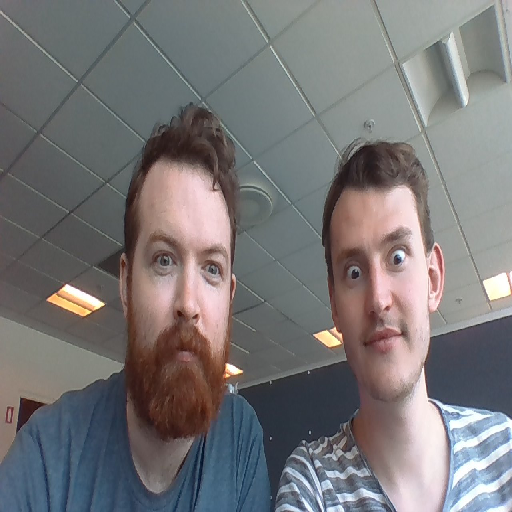

In [6]:
height = 512
width = 512

content_img_path = 'selfie.jpg'
content_img = Image.open(content_img_path)
content_img = content_img.resize((height, width))
content_img

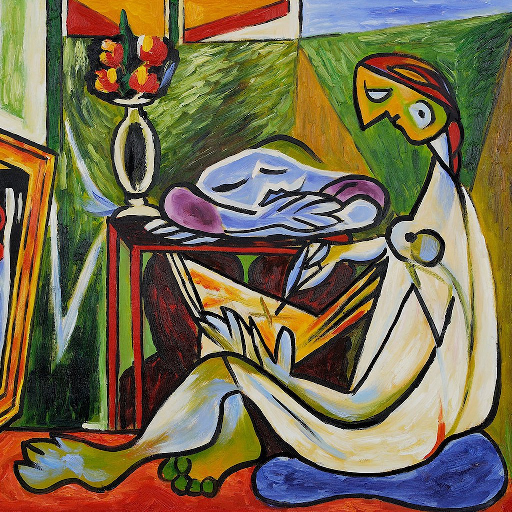

In [7]:
style_img_path = 'gothi.jpg'
#style_img_path = 'drive/AIP_Miniproject/content/selfie.jpg'
#other style images:
#block.jpg
#forest.jpg
#gothic.jpg
#marilyn.jpg
#picasso.jpg
#scream.jpg
#starry_night.jpg
#van_gough.jpg
#wave.jpg
style_img = Image.open(style_img_path)
style_img = style_img.resize((height, width))
style_img


Create arrays from images. array dimensions default to width, height, color (512, 512, 3).

expand dims adds an extra dimension that is used to concatenate two images into a common structure.

In [8]:
content_array = np.asarray(content_img, dtype='float32')
content_array = np.expand_dims(content_array, axis=0)
print(content_array.shape)

style_array = np.asarray(style_img, dtype='float32')
style_array = np.expand_dims(style_array, axis=0)
print(style_array.shape)



(1, 512, 512, 3)
(1, 512, 512, 3)


subtracy mean RGB values and  reorganised to BGR

In [0]:
content_array[:,:,:,0] -= 103.939
content_array[:,:,:,1] -= 116.779
content_array[:,:,:,2] -= 123.68
content_array = content_array[:,:,:,::-1]

style_array[:,:,:,0] -= 103.939
style_array[:,:,:,1] -= 116.779
style_array[:,:,:,2] -= 123.68
style_array = style_array[:,:,:,::-1]


In [0]:
content_img = backend.variable(content_array)
style_img = backend.variable(style_array)
combination_img = backend.placeholder((1, height, width, 3))

In [0]:
input_tensor = backend.concatenate([content_img,
                                   style_img,
                                   combination_img], axis=0)

# Use VGG16 model to define loss function


In [12]:
model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top = False)

58892288/58889256 [==============================] - 7s 0us/step


In [13]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(3, 512, 512, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(3, 512, 512, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(3, 256, 256, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(3, 256, 256, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(3, 256, 256, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(3, 128, 128, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(3, 64, 64, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(3, 64, 64, 512) dtype=float32>,
 'b

# Weights
These weights are arbitrarily chosen based on experiments, and determine the aesthetic of the output image


In [0]:
content_weight = 0.025
style_weight = 5.0
total_variation_weight = 1.0

In [0]:
loss = backend.variable(0.)

#Content Loss

Content loss are drawned from block2_conv2 to ensure the structural detial of the content image is kept. The content loss is the scaled squared Euclidian distance between feature representations of the content and combination images

In [16]:
def content_loss(content, combination):
  return backend.sum(backend.square(combination - content))

layer_features = layers['block2_conv2'] # To do: Try different Layers here!
content_img_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]

loss += content_weight * content_loss(content_img_features, combination_features)


#Style Loss

Style loss are firstly defined by a gram matrix that are proportional to the covariances of corresponding sets of features, and thus captures information about which features tend to activate together. This will enable the network to only catch information about the style dependent of the content

In [0]:
def gram_matrix(x):
  features = backend.batch_flatten(backend.permute_dimensions(x, (2, 0, 1)))
  gram = backend.dot(features, backend.transpose(features))
  return gram


The style loss is the Frobenius norm of the difference between the Gram matrices of the style and combination images. The layers used below can also be changed for better results.

In [0]:
def style_loss(style, combination):
  s = gram_matrix(style)
  c = gram_matrix(combination)
  channels = 3
  size = height * width
  return backend.sum(backend.square(s - c)) / (4. * (channels ** 2)*(size ** 2))

feature_layers = ['block1_conv2', 'block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']

for layer_name in feature_layers:
  layer_features = layers[layer_name]
  style_features = layer_features[1, :, :, :]
  combination_features = layer_features[2, :, :, :]
  sl = style_loss(style_features, combination_features)
  loss += (style_weight / len(feature_layers)) * sl
  
  

#Total Variation Loss

Total variation loss reduces the noisiness of the output image.

In [0]:
def total_variation_loss(x):
  a = backend.square(x[:, :height-1, :width-1, :]-x[:, 1:, :width-1, :])
  b = backend.square(x[:, :height-1, :width-1, :]-x[:, :height-1, 1:, :])
  return backend.sum(backend.pow(a + b, 1.25))

loss += total_variation_weight * total_variation_loss(combination_img)

In [0]:
grads = backend.gradients(loss, combination_img)

In [0]:
outputs = [loss]
outputs += grads
f_outputs = backend.function([combination_img], outputs)

def eval_loss_and_grads(x):
  x = x.reshape((1, height, width, 3))
  outs = f_outputs([x])
  loss_value = outs[0]
  grad_values = outs[1].flatten().astype('float64')
  return loss_value, grad_values

class Evaluator(object):
  
  def __init__(self):
        self.loss_value = None
        self.grads_values = None

  def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

  def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values
      
evaluator = Evaluator()

In [22]:
x = np.random.uniform(0, 255, (1, height, width, 3)) - 128.

iterations = 50

for i in range(iterations):
  print('Start of iteration', i)
  start_time = time.time()
  x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                                     fprime=evaluator.grads, maxfun=20)
  
  
  print('Current loss value:', min_val)
  end_time = time.time()
  print('Iteration %d completed in %ds' % (i, end_time - start_time))
  

Start of iteration 0
Current loss value: 140225450000.0
Iteration 0 completed in 23s
Start of iteration 1
Current loss value: 88658220000.0
Iteration 1 completed in 18s
Start of iteration 2
Current loss value: 71200140000.0
Iteration 2 completed in 18s
Start of iteration 3
Current loss value: 62696670000.0
Iteration 3 completed in 19s
Start of iteration 4
Current loss value: 58000640000.0
Iteration 4 completed in 19s
Start of iteration 5
Current loss value: 55239000000.0
Iteration 5 completed in 19s
Start of iteration 6
Current loss value: 53814604000.0
Iteration 6 completed in 18s
Start of iteration 7
Current loss value: 52892058000.0
Iteration 7 completed in 18s
Start of iteration 8
Current loss value: 52168440000.0
Iteration 8 completed in 18s
Start of iteration 9
Current loss value: 51561026000.0
Iteration 9 completed in 19s
Start of iteration 10
Current loss value: 51184062000.0
Iteration 10 completed in 19s
Start of iteration 11
Current loss value: 50913970000.0
Iteration 11 comp

Current loss value: 49611490000.0
Iteration 47 completed in 19s
Start of iteration 48
Current loss value: 49610195000.0
Iteration 48 completed in 19s
Start of iteration 49
Current loss value: 49608910000.0
Iteration 49 completed in 19s


In [0]:
x = x.reshape((height, width, 3))
x = x[:,:,::-1]
x[:,:,0] += 103.939
x[:,:,1] += 116.779
x[:,:,:] += 123.68

x = np.clip(x, 0, 255).astype('uint8')
im = Image.fromarray(x)


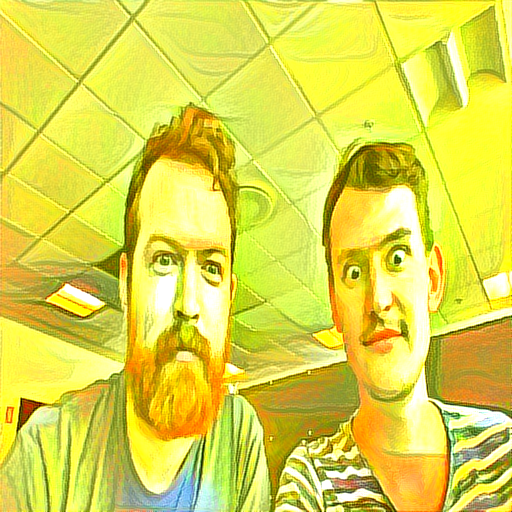

In [24]:
im